In [58]:
from pathlib import Path

import gin
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from torch import tensor

from src.game import ISR
from src.data import Circle, CircleLoss
from src.utils import circle_diff

In [56]:
def plot(logdir, savedir):
    if savedir:
        savepath = Path(savedir)
        
    logpath = Path(logdir)    

    config_file = next(logpath.glob('**/*.gin'))
    gin.parse_config_file(config_file, skip_unknown=True)
    circle = Circle()
    circle_loss = CircleLoss(circle.num_points)
    
    run_logs = []
    for path in logpath.glob('**/*.json'):
        print(f'plotting from {path}')
        with open(path, 'r') as logfile:
            run_logs.append(pd.read_json(logfile))

    logs = pd.concat(run_logs, ignore_index=True)
    sender = pd.DataFrame(logs['sender'].to_list()).join(logs['episode'])
    recver = pd.DataFrame(logs['recver'].to_list()).join(logs['episode'])
    
    sns.set()
    
    # Rewards
    sns.lineplot(data=sender, x="episode", y="reward", label="sender")
    sns.lineplot(data=recver, x="episode", y="reward", label="recver")

    # Baselines
    nocomm_loss = torch.tensor(circle.num_points / 4)
    nocomm_rew = circle_loss(tensor(0.), nocomm_loss)
#     oneshot_loss = env.bias_space.low / 2 + (env.bias_space.range) / 4
    fair_loss = circle.bias / 2
    fair_rew = circle_loss(tensor(0.), fair_loss)
    plt.axhline(nocomm_rew, label='no communication', color="black", dashes=(2,2,2,2))
    plt.axhline(fair_rew, label='fair split', color="grey", dashes=(2,2,2,2))

    plt.legend()
    if savedir:
        plt.savefig(savepath / 'rewards.png')
    plt.show()
    plt.clf()

    # REWARD PER ROUND
#     sround = np.array(sender['round_reward'])
#     rround = np.array(recver['round_reward'])
#     avg_round = (sround + rround) / 2
#     for r in range(env.num_rounds):
#         # plt.plot(x, running_mean(avg_round[:,r]), label='avg_round-{}'.format(r))
#         # plt.plot(x, running_mean(sround[:,r]), label='sender-{}'.format(r))
#         plt.plot(x, running_mean(rround[:,r]), label='recver-{}'.format(r))
#     plt.axhline(oneshot_rew, label='one-shot baseline')
#     plt.legend()
#     if savedir:
#         plt.savefig(f'{savedir}/round.png')
#     plt.show()
#     plt.clf()

    # WEIGHTS
    # weights = np.array(recver['weights'])
    # biases = np.array(recver['biases'])[:,np.newaxis]
    # num_weights = weights.shape[1]
    # for i in range(num_weights):
        # plt.plot(x, running_mean(weights[:,i]), label=f'weight {i}')
        # plt.plot(x, running_mean(biases[:,i]), label=f'bias {i}')
    # plt.title('Weights')
    # plt.legend()
    # if savedir:
        # plt.savefig(f'{savedir}/weights.png')
    # plt.show()

    # # ABS DIFF AT ROUND 5
    # plt.plot(x, running_mean(env.send_diffs), label='sender')
    # plt.plot(x, running_mean(env.recv_diffs), label='recver')
    # plt.title('Absolute diff at Round 5')
    # plt.legend()
    # if savedir:
        # plt.savefig(f'{savedir}/diff.png')
    # plt.show()

    # Sender and Recver Output Samples
#     for sample in ["0", "15", "30"]:
#         sns.lineplot(data=sender, x=sender.index, y=sample, label=sample)

#     plt.title('Sender output samples')
#     plt.ylabel('')
#     plt.legend()
#     if savedir:
#         plt.savefig(f'{savedir}/send_samples.png')
#     plt.show()
#     plt.clf()

#     for sample in ["0", "15", "30"]:
#         sns.lineplot(data=recver, x=recver.index, y=sample, label=sample)
#     plt.title('Recver output samples')
#     plt.legend()
#     if savedir:
#         plt.savefig(f'{savedir}/recv_samples.png')
#     plt.show()
#     plt.clf()

    # # ENTROPY
    # if 'entropy' in recver:
        # plt.plot(x, recver['entropy'], label='entropy')
        # plt.legend()
        # if savedir:
            # plt.savefig(f'{savedir}/entropy.png')
        # plt.show()


plotting from ../results/test/logs.json


NameError: name 'tensor' is not defined

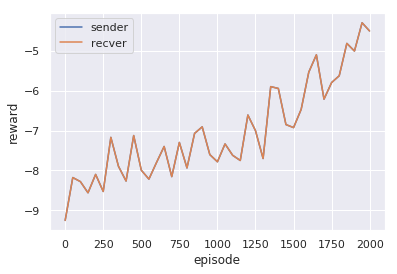

In [57]:
# for i in range(3):
#     logpath = f'../results/deter-deter-lola/lola{i}-vocab1-bias1'
logpath = '../results/test'

with sns.plotting_context('paper'):
#     plt.title(f'LOLA-{i}')
    plot(logpath, logpath)



In [43]:
def old_plot(logdir, savedir):
    if savedir:
        savepath = Path(savedir)
        
    logpath = Path(logdir)    

    config_file = next(logpath.glob('**/*.gin'))
    gin.parse_config_file(config_file, skip_unknown=True)
    env = ISR()
    
    run_logs = []
    for path in logpath.glob('**/*.json'):
        print(f'plotting from {path}')
        with open(path, 'r') as logfile:
            run_logs.append(pd.read_json(logfile))

    logs = pd.concat(run_logs, ignore_index=True)
    sender = pd.DataFrame(logs['sender'].to_list()).join(logs['episode'])
    recver = pd.DataFrame(logs['recver'].to_list()).join(logs['episode'])
    
    sns.set()
    
    # Rewards
    sns.lineplot(data=sender, x="episode", y="reward", label="sender")
    sns.lineplot(data=recver, x="episode", y="reward", label="recver")

    # Baselines
    nocomm_loss = torch.tensor(env.observation_space.n / 4)
    nocomm_rew = env._reward(nocomm_loss)
    oneshot_loss = env.bias_space.low / 2 + (env.bias_space.range) / 4
    oneshot_rew = env._reward(oneshot_loss)
    plt.axhline(nocomm_rew, label='no communication', color="black", dashes=(2,2,2,2))
    plt.axhline(oneshot_rew, label='fair split', color="grey", dashes=(2,2,2,2))

    plt.legend()
    if savedir:
        plt.savefig(savepath / 'rewards.png')
    plt.show()
    plt.clf()